## **`Sara Mohamed Korayem`**

## **`2 1 1 0 0 1 5 3 5`**


---

# **Machine Learning for Drug Discovery (QSAR)**

Dataset used: https://www.ebi.ac.uk/chembl/target_report_card/CHEMBL235/

In [41]:
! pip install chembl_webresource_client

  Using cached chembl_webresource_client-0.10.9-py3-none-any.whl (55 kB)
ERROR: Could not find a version that satisfies the requirement requests-cache~=1.2 (from chembl_webresource_client) (from versions: 0.1.0, 0.1.1, 0.1.2, 0.1.3, 0.2.0, 0.2.1, 0.3.0, 0.4.0, 0.4.1, 0.4.2, 0.4.3, 0.4.4, 0.4.5, 0.4.6, 0.4.7, 0.4.8, 0.4.9, 0.4.10, 0.4.11, 0.4.12, 0.4.13, 0.5.0, 0.5.1, 0.5.2, 0.6.0, 0.6.1, 0.6.2, 0.6.3, 0.6.4, 0.7.0, 0.7.1, 0.7.2, 0.7.3, 0.7.4, 0.7.5, 0.8.0, 0.8.1, 0.9.0, 0.9.1, 0.9.2, 0.9.3, 0.9.4, 0.9.5, 0.9.6, 0.9.7, 0.9.8, 1.0.0a0, 1.0.0a1, 1.0.0a2, 1.0.0b0, 1.0.0b1, 1.0.0, 1.0.1, 1.1.0, 1.1.1)
ERROR: No matching distribution found for requests-cache~=1.2 (from chembl_webresource_client)


## **Importing libraries**

In [42]:
# Import necessary libraries
import pandas as pd
from chembl_webresource_client.new_client import new_client

# Search for target protein in chEMBL

## **Target search: diabetes**

In [43]:
# Target search for coronavirus
target = new_client.target
target_query = target.search('diabetes')
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Homo sapiens,Islet amyloid polypeptide,18.0,False,CHEMBL1914266,"[{'accession': 'P10997', 'component_descriptio...",SINGLE PROTEIN,9606
1,"[{'xref_id': 'P37231', 'xref_name': None, 'xre...",Homo sapiens,Peroxisome proliferator-activated receptor gamma,9.0,False,CHEMBL235,"[{'accession': 'P37231', 'component_descriptio...",SINGLE PROTEIN,9606
2,"[{'xref_id': 'P37238', 'xref_name': None, 'xre...",Mus musculus,Peroxisome proliferator-activated receptor gamma,9.0,False,CHEMBL2459,"[{'accession': 'P37238', 'component_descriptio...",SINGLE PROTEIN,10090
3,"[{'xref_id': 'O88275', 'xref_name': None, 'xre...",Rattus norvegicus,Peroxisome proliferator-activated receptor gamma,9.0,False,CHEMBL4797,"[{'accession': 'O88275', 'component_descriptio...",SINGLE PROTEIN,10116
4,[],Canis familiaris,Peroxisome proliferator-activated receptor gamma,9.0,False,CHEMBL1932903,"[{'accession': 'Q4U3Q4', 'component_descriptio...",SINGLE PROTEIN,9615
5,[],Homo sapiens,Peroxisome proliferator-activated receptor gam...,9.0,False,CHEMBL2095161,"[{'accession': 'P37231', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
6,[],Homo sapiens,Peroxisome proliferator-activated receptor gam...,9.0,False,CHEMBL2095162,"[{'accession': 'P37231', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
7,[],Homo sapiens,Peroxisome proliferator-activated receptor gam...,9.0,False,CHEMBL2095163,"[{'accession': 'P37231', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
8,[],Homo sapiens,Peroxisome proliferator-activated receptor gam...,9.0,False,CHEMBL2096976,"[{'accession': 'P37231', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
9,[],Homo sapiens,PPAR delta/gamma,9.0,False,CHEMBL2111371,"[{'accession': 'P37231', 'component_descriptio...",SELECTIVITY GROUP,9606


### **Select and retrieve bioactivity data for *Peroxisome proliferated activated receptor gamma* (2nd entry)**



In [44]:
selected_target = targets.target_chembl_id[1] #the second entry
selected_target

'CHEMBL235'

Here, we will retrieve only bioactivity data for diabetes' peroxisome proliferated activated receptor gamma (CHEMBL235) that are reported as IC$_{50}$ values in nM (nanomolar) unit.


In [45]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50") #only use IC50

df = pd.DataFrame.from_dict(res)


In [46]:
df.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,None,105368,[],CHEMBL759452,In vitro binding affinity against human peroxi...,B,None,None,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,None,None,IC50,uM,UO_0000065,None,0.291
1,None,None,108760,[],CHEMBL759452,In vitro binding affinity against human peroxi...,B,None,None,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,None,None,IC50,uM,UO_0000065,None,0.17
2,None,None,108770,[],CHEMBL759452,In vitro binding affinity against human peroxi...,B,None,None,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,None,None,IC50,uM,UO_0000065,None,0.073


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2258 entries, 0 to 2257
Data columns (total 46 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   action_type                101 non-null    object 
 1   activity_comment           468 non-null    object 
 2   activity_id                2258 non-null   int64  
 3   activity_properties        2258 non-null   object 
 4   assay_chembl_id            2258 non-null   object 
 5   assay_description          2258 non-null   object 
 6   assay_type                 2258 non-null   object 
 7   assay_variant_accession    0 non-null      object 
 8   assay_variant_mutation     0 non-null      object 
 9   bao_endpoint               2258 non-null   object 
 10  bao_format                 2258 non-null   object 
 11  bao_label                  2258 non-null   object 
 12  canonical_smiles           2258 non-null   object 
 13  data_validity_comment      9 non-null      objec

In [48]:
df.shape

(2258, 46)

In [49]:
df.standard_type.unique()

array(['IC50'], dtype=object)

## Finally we will save the resulting bioactivity data containing IC50 to a CSV file **bioactivity_data.csv**.

In [50]:
df.to_csv('bioactivity_data.csv', index=False)
from google.colab import files
files.download('bioactivity_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Taking a glimpse of the **bioactivity_data.csv** file that we've just created.

In [51]:
! head bioactivity_data.csv

action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,bao_label,canonical_smiles,data_validity_comment,data_validity_description,document_chembl_id,document_journal,document_year,ligand_efficiency,molecule_chembl_id,molecule_pref_name,parent_molecule_chembl_id,pchembl_value,potential_duplicate,qudt_units,record_id,relation,src_id,standard_flag,standard_relation,standard_text_value,standard_type,standard_units,standard_upper_value,standard_value,target_chembl_id,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
,,105368,[],CHEMBL759452,In vitro binding affinity against human peroxisome proliferator activated receptor gamma,B,,,BAO_0000190,BAO_0000357,single protein format,CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC(=O)NC2=O)c1,,,CHEMBL1136170,Bioorg Med Chem Lett,2003.0,"{'bei': '12.25', 'le': '0.23', 'lle': '-0.

In [52]:
df_bio_ic50 = pd.read_csv('bioactivity_data.csv')

In [53]:
df_bio_ic50.head(3)

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,105368,[],CHEMBL759452,In vitro binding affinity against human peroxi...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.291
1,NaN,NaN,108760,[],CHEMBL759452,In vitro binding affinity against human peroxi...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.170
2,NaN,NaN,108770,[],CHEMBL759452,In vitro binding affinity against human peroxi...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.073


## **Handling missing data**
If any compounds has missing value for the **standard_value** column then drop it


In [54]:
# Assuming df_bioactivity_ic50 is your DataFrame
missing_values_count = df_bio_ic50.isnull().sum()

# Print the number of missing values in each column
print("Number of missing values in each column:")
print(missing_values_count)


Number of missing values in each column:
action_type                  2157
activity_comment             1790
activity_id                     0
activity_properties             0
assay_chembl_id                 0
assay_description               0
assay_type                      0
assay_variant_accession      2258
assay_variant_mutation       2258
bao_endpoint                    0
bao_format                      0
bao_label                       0
canonical_smiles                0
data_validity_comment        2249
data_validity_description    2249
document_chembl_id              0
document_journal              374
document_year                  20
ligand_efficiency             660
molecule_chembl_id              0
molecule_pref_name           2099
parent_molecule_chembl_id       0
pchembl_value                 357
potential_duplicate             0
qudt_units                     79
record_id                       0
relation                      119
src_id                          0
standar

In [55]:
df_clean = df_bio_ic50[df_bio_ic50.standard_value.notna()]
df_clean

,action_type,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,NaN,NaN,105368,[],CHEMBL759452,In vitro binding affinity against human peroxi...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.291
1,NaN,NaN,108760,[],CHEMBL759452,In vitro binding affinity against human peroxi...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.170
2,NaN,NaN,108770,[],CHEMBL759452,In vitro binding affinity against human peroxi...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.073
3,NaN,NaN,108782,[],CHEMBL759452,In vitro binding affinity against human peroxi...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.250
4,NaN,NaN,115395,[],CHEMBL759452,In vitro binding affinity against human peroxi...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2253,"{'action_type': 'AGONIST', 'description': 'Bin...",NaN,25031283,[],CHEMBL5241789,Agonist activity at PPARgamma (unknown origin),B,NaN,NaN,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,0.566
2254,"{'action_type': 'ANTAGONIST', 'description': '...",NaN,25031302,[],CHEMBL5241798,Antagonist activity at PPARgamma (unknown origin),B,NaN,NaN,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,3.500
2255,"{'action_type': 'PARTIAL AGONIST', 'descriptio...",NaN,25092762,[],CHEMBL5258849,Partial agonist activity at PPARgamma (unknown...,B,NaN,NaN,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,IC50,uM,UO_0000065,NaN,5.300
2256,"{'action_type': 'AGONIST', 'description': 'Bin...",NaN,25110709,[],CHEMBL5264996,Agonist activity at PPARgamma (unknown origin),B,NaN,NaN,BAO_0000190,...,Homo sapiens,Peroxisome proliferator-activated receptor gamma,9606,NaN,NaN,IC50,nM,UO_0000065,NaN,18.000


 Here's an overview of what each column might represent and some insights you can gain from the dataset:

### Column Descriptions

1. **action_type**: The type of action the molecule exhibits (e.g., inhibitor, agonist).
2. **activity_comment**: Comments related to the activity measurement.
3. **activity_id**: Unique identifier for the activity entry.
4. **activity_properties**: Properties associated with the activity.
5. **assay_chembl_id**: Identifier for the assay in the ChEMBL database.
6. **assay_description**: Description of the assay used to measure activity.
7. **assay_type**: Type of assay (e.g., binding, functional).
8. **assay_variant_accession**: Accession number for assay variants (if any).
9. **assay_variant_mutation**: Details of any mutations in the assay variant.
10. **bao_endpoint**: BioAssay Ontology endpoint description.
11. **bao_format**: Format of the BioAssay Ontology data.
12. **bao_label**: Label from the BioAssay Ontology.
### 13. **canonical_smiles**: Canonical SMILES representation of the molecule.
14. **data_validity_comment**: Comments on the validity of the data.
15. **data_validity_description**: Description of data validity.
16. **document_chembl_id**: Identifier for the document in the ChEMBL database.
17. **document_journal**: Journal where the data was published.
18. **document_year**: Year of publication.
19. **ligand_efficiency**: Efficiency metrics for the ligand.
### 20. **molecule_chembl_id**: Identifier for the molecule in the ChEMBL database.
21. **molecule_pref_name**: Preferred name of the molecule.
22. **parent_molecule_chembl_id**: Identifier for the parent molecule.
23. **pchembl_value**: Potency measurement (pChEMBL value).
24. **potential_duplicate**: Indicator if the entry is a potential duplicate.
25. **qudt_units**: Units used in the Quantities, Units, Dimensions, and Types (QUDT) ontology.
26. **record_id**: Identifier for the record.
27. **relation**: Relationship between measured value and actual activity.
28. **src_id**: Source identifier.
29. **standard_flag**: Flag indicating if the value is a standard value.
30. **standard_relation**: Relationship for the standard value.
31. **standard_text_value**: Standard value in text form.
32. **standard_type**: Type of standard value (e.g., IC50, Ki).
33. **standard_units**: Units for the standard value.
34. **standard_upper_value**: Upper value for the standard range.
### 35. **standard_value**: Standard activity value.
36. **target_chembl_id**: Identifier for the target in the ChEMBL database.
37. **target_organism**: Organism of the target (e.g., Homo sapiens).
38. **target_pref_name**: Preferred name of the target.
39. **target_tax_id**: Taxonomy identifier for the target organism.
40. **text_value**: Activity value in text form.
41. **toid**: Target organism identifier.
42. **type**: Type of measurement.
43. **units**: Units of the measurement.
44. **uo_units**: Units from the Unit Ontology (UO).
45. **upper_value**: Upper bound of the measurement value.
46. **value**: Measured activity value.



In [56]:
column_contents = df['standard_value']
print(column_contents)

0        291.0
1        170.0
2         73.0
3        250.0
4        195.0
         ...  
2253     566.0
2254    3500.0
2255    5300.0
2256      18.0
2257      18.0
Name: standard_value, Length: 2258, dtype: object


## **Data pre-processing of the bioactivity data**


### **Labeling compounds as either being active, inactive or intermediate**
The bioactivity data is in the IC50 unit. Compounds having values of less than 1000 nM will be considered to be **active** while those greater than 10,000 nM will be considered to be **inactive**. As for those values in between 1,000 and 10,000 nM will be referred to as **intermediate**.

In [57]:
bioactivity_class = []
for i in df_bio_ic50.standard_value:
  if float(i) >= 10000:
    bioactivity_class.append("inactive")
  elif float(i) <= 1000:
    bioactivity_class.append("active")
  else:
    bioactivity_class.append("intermediate")


### **Iterate the *molecule_chembl_id, standard value, bioactivity class and canonical smiles* to a list**

In [58]:
selection = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df_new = df_clean[selection]
df_new
#bioactivity_class is a list created earlier

df_new = pd.concat([df_new, pd.Series(bioactivity_class, name='bioactivity_class')], axis=1)

In [59]:
df_new.shape

(2258, 4)

These columns are important for the following reasons:

**molecule_chembl_id:** This is a unique identifier for each molecule in the ChEMBL database. It allows you to uniquely identify and track specific molecules throughout your analysis. For example, if you need to retrieve additional information or perform data validation, this ID is crucial for referencing the correct molecule.

**canonical_smiles:** SMILES (Simplified Molecular Input Line Entry System) notation is a textual representation of a molecule's structure. The canonical SMILES is a standardized version of this notation that uniquely represents the molecular structure. It's essential because it provides a compact and human-readable way to describe molecules, which is useful for chemical informatics tasks like similarity searching, structure-activity relationship analysis, and chemical database storage.

**Chemical Similarity and Structure-Activity Relationship (SAR) Analysis:** SMILES notation allows for easy comparison and similarity searching among different molecules. In drug discovery, chemical similarity is often used to identify potential drug candidates or analogs based on their structural features. Pairing canonical SMILES with IC50 values enables researchers to perform structure-activity relationship (SAR) analysis, where they correlate structural features with bioactivity data to understand how changes in molecular structure affect biological activity.


**standard_value:** This column likely contains the standardized activity values (such as IC50, Ki, etc.) associated with the molecules in your dataset. These values represent the potency or activity level of each molecule against a specific biological target (e.g., a protein). Understanding these values is crucial for identifying potential drug candidates or bioactive compounds. For example, IC50 values indicate the concentration of a compound needed to inhibit a biological process by 50%, which is vital information in drug discovery and pharmacology

Saves dataframe to CSV file

In [60]:
df_new.to_csv('bioactivity_preprocessed_data.csv', index=False)
from google.colab import files
files.download('bioactivity_preprocessed_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now will be performing Descriptor Calculation and Exploratory Data Analysis.

## **Install conda and rdkit**

In [61]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2024-06-02 15:20:46--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.32.241, 104.16.191.158, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.32.241|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M   177MB/s    in 0.5s    

2024-06-02 15:20:47 (177 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: - \ | / - \ | / - \ | done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - _libgcc_mutex==0.1=main
    - asn1crypto==1.3.0=py37_0
    - ca-certificates==2020.1.1=0
    - certifi==2019.11.28=py37_0
    - cffi==1.14.0=py37h2e261b9_0
    - chardet==3.0.4=py37_10

## **Load bioactivity data**

In [62]:
import pandas as pd

df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [63]:
df.head(3)

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL327767,CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC...,291.0,active
1,CHEMBL94496,CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(...,170.0,active
2,CHEMBL420441,CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)...,73.0,active


## **Calculate Lipinski descriptors**
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

Relation to dataset:

**Canonical_SMILES:** Canonical SMILES (Simplified Molecular Input Line Entry System) is a textual representation of a molecule's chemical structure. Lipinski descriptors often use this information to calculate molecular properties such as molecular weight, LogP, hydrogen bond acceptors, and hydrogen bond donors, which are essential for evaluating drug-likeness according to Lipinski's Rule of Five.

**MW** (Molecular Weight): It calculates the total atomic weights of all atoms in the molecule.

**LogP** (Logarithm of the Octanol-Water Partition Coefficient): It estimates how hydrophobic or lipophilic a molecule is, which can be important for understanding its behavior in biological systems.

Lipinski's Rule suggests that the LogP should be less than 5. Compounds with excessively high LogP values may have poor aqueous solubility and absorption.

**NumHDonors** (Number of Hydrogen Bond Donors): It counts the number of hydrogen atoms attached to electronegative atoms (like oxygen or nitrogen) that can potentially act as hydrogen bond donors.

The number of hydrogen bond donor groups in the compound should not exceed 5.

**NumHAcceptors** (Number of Hydrogen Bond Acceptors): It counts the number of electronegative atoms (like oxygen or nitrogen) capable of forming hydrogen bonds by accepting hydrogen atoms.

 Lipinski's Rule recommends that the number of hydrogen bond acceptor groups in the compound should not exceed 10.

In [64]:
%pip install rdkit


In [65]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

## **Calculate descriptors**

### Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation to calculate descriptors.

In [66]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem)
        moldata.append(mol)

    baseData= np.arange(1,1)
    i=0
    for mol in moldata:

        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)

        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])

        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1

    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)

    return descriptors

### **Combine DataFrames**

Let's take a look at the 2 DataFrames that will be combined.

In [70]:
# missing_smiles = df[df['canonical_smiles'].isnull()]

# # Print rows with missing SMILES
# print("Rows with missing canonical_smiles:")
# print(missing_smiles)

In [69]:
df = df.dropna(subset=['canonical_smiles'])

In [71]:
df_lipinski = lipinski(df.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,533.690,7.5019,1.0,6.0
1,519.663,7.4268,1.0,6.0
2,512.027,6.9568,1.0,6.0
3,357.435,2.4909,1.0,6.0
4,491.609,6.6935,1.0,6.0
...,...,...,...,...
2156,348.378,3.7166,0.0,4.0
2157,316.265,2.2910,4.0,7.0
2158,427.504,5.2024,2.0,4.0
2159,514.217,7.4415,1.0,4.0


In [72]:
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL327767,CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC...,291.0,active
1,CHEMBL94496,CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(...,170.0,active
2,CHEMBL420441,CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)...,73.0,active
3,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,250.0,active
4,CHEMBL330191,CCCc1cc(Oc2ccccc2)ccc1OCCCCOc1cccc(C2SC(=O)NC2...,195.0,active
...,...,...,...,...
2156,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,566.0,active
2157,CHEMBL379064,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,3500.0,intermediate
2158,CHEMBL5290209,CC(C)(C)c1ccc(-n2cnc3c(NC(=O)Cc4ccc(C(=O)O)cc4...,5300.0,intermediate
2159,CHEMBL1236924,O=S(=O)(Nc1cc(Cl)c(Oc2cnc3ccccc3c2)c(Cl)c1)c1c...,18.0,active


Now, let's combine the 2 DataFrame


In [73]:
df_combined = pd.concat([df,df_lipinski], axis=1)

df_combined

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL327767,CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC...,291.0,active,533.690,7.5019,1.0,6.0
1,CHEMBL94496,CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(...,170.0,active,519.663,7.4268,1.0,6.0
2,CHEMBL420441,CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)...,73.0,active,512.027,6.9568,1.0,6.0
3,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,250.0,active,357.435,2.4909,1.0,6.0
4,CHEMBL330191,CCCc1cc(Oc2ccccc2)ccc1OCCCCOc1cccc(C2SC(=O)NC2...,195.0,active,491.609,6.6935,1.0,6.0
...,...,...,...,...,...,...,...,...
2156,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,566.0,active,348.378,3.7166,0.0,4.0
2157,CHEMBL379064,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,3500.0,intermediate,316.265,2.2910,4.0,7.0
2158,CHEMBL5290209,CC(C)(C)c1ccc(-n2cnc3c(NC(=O)Cc4ccc(C(=O)O)cc4...,5300.0,intermediate,427.504,5.2024,2.0,4.0
2159,CHEMBL1236924,O=S(=O)(Nc1cc(Cl)c(Oc2cnc3ccccc3c2)c(Cl)c1)c1c...,18.0,active,514.217,7.4415,1.0,4.0


### **Convert IC50 to pIC50**
To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [74]:
# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', axis = 1)

    return x

Function called `pIC50(input)` was created to calculates the pIC50 values from the 'standard_value_norm' column in the input DataFrame, performs some data transformations, and returns the modified DataFrame with the pIC50 values added as a new column.

Point to note: Values greater than 100,000,000 will be fixed at 100,000,000 otherwise the negative logarithmic value will become negative.


The -np.log10(concentration) transformation is one of the ways to convert concentrations to a logarithmic scale. The resulting values (such as -1 in your case) are easier to work with when dealing with orders of magnitude differences in concentration

In [75]:
df_combined.standard_value.describe()

-np.log10( (10**-9)* 100000000 )

-np.log10( (10**-9)* 10000000000 )

-1.0

In [76]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', axis = 1)

    return x

We will first apply the norm_value() function so that the values in the standard_value column is normalized.

In [77]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL327767,CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC...,active,533.690,7.5019,1.0,6.0,291.0
1,CHEMBL94496,CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(...,active,519.663,7.4268,1.0,6.0,170.0
2,CHEMBL420441,CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)...,active,512.027,6.9568,1.0,6.0,73.0
3,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,active,357.435,2.4909,1.0,6.0,250.0
4,CHEMBL330191,CCCc1cc(Oc2ccccc2)ccc1OCCCCOc1cccc(C2SC(=O)NC2...,active,491.609,6.6935,1.0,6.0,195.0
...,...,...,...,...,...,...,...,...
2156,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,active,348.378,3.7166,0.0,4.0,566.0
2157,CHEMBL379064,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,intermediate,316.265,2.2910,4.0,7.0,3500.0
2158,CHEMBL5290209,CC(C)(C)c1ccc(-n2cnc3c(NC(=O)Cc4ccc(C(=O)O)cc4...,intermediate,427.504,5.2024,2.0,4.0,5300.0
2159,CHEMBL1236924,O=S(=O)(Nc1cc(Cl)c(Oc2cnc3ccccc3c2)c(Cl)c1)c1c...,active,514.217,7.4415,1.0,4.0,18.0


In [78]:
df_norm.standard_value_norm.describe()

count       2161.000000
mean        6699.252271
std        31674.432799
min            0.060000
25%           35.400000
50%          440.000000
75%         3981.000000
max      1000000.000000
Name: standard_value_norm, dtype: float64

In [79]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2161 entries, 0 to 2160
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   molecule_chembl_id   2161 non-null   object 
 1   canonical_smiles     2161 non-null   object 
 2   bioactivity_class    2161 non-null   object 
 3   MW                   2161 non-null   float64
 4   LogP                 2161 non-null   float64
 5   NumHDonors           2161 non-null   float64
 6   NumHAcceptors        2161 non-null   float64
 7   standard_value_norm  2161 non-null   float64
dtypes: float64(5), object(3)
memory usage: 151.9+ KB


In [80]:
df_norm.shape

(2161, 8)

In [81]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL327767,CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC...,active,533.690,7.5019,1.0,6.0,6.536107
1,CHEMBL94496,CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(...,active,519.663,7.4268,1.0,6.0,6.769551
2,CHEMBL420441,CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)...,active,512.027,6.9568,1.0,6.0,7.136677
3,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,active,357.435,2.4909,1.0,6.0,6.602060
4,CHEMBL330191,CCCc1cc(Oc2ccccc2)ccc1OCCCCOc1cccc(C2SC(=O)NC2...,active,491.609,6.6935,1.0,6.0,6.709965
...,...,...,...,...,...,...,...,...
2156,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,active,348.378,3.7166,0.0,4.0,6.247184
2157,CHEMBL379064,COc1cc(-c2oc3cc(O)cc(O)c3c(=O)c2O)ccc1O,intermediate,316.265,2.2910,4.0,7.0,5.455932
2158,CHEMBL5290209,CC(C)(C)c1ccc(-n2cnc3c(NC(=O)Cc4ccc(C(=O)O)cc4...,intermediate,427.504,5.2024,2.0,4.0,5.275724
2159,CHEMBL1236924,O=S(=O)(Nc1cc(Cl)c(Oc2cnc3ccccc3c2)c(Cl)c1)c1c...,active,514.217,7.4415,1.0,4.0,7.744727


In [82]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2161 entries, 0 to 2160
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  2161 non-null   object 
 1   canonical_smiles    2161 non-null   object 
 2   bioactivity_class   2161 non-null   object 
 3   MW                  2161 non-null   float64
 4   LogP                2161 non-null   float64
 5   NumHDonors          2161 non-null   float64
 6   NumHAcceptors       2161 non-null   float64
 7   pIC50               2161 non-null   float64
dtypes: float64(5), object(3)
memory usage: 151.9+ KB


In [83]:
df_final.pIC50.describe()

count    2161.000000
mean        6.452512
std         1.273241
min         3.000000
25%         5.400008
50%         6.356547
75%         7.450997
max        10.221849
Name: pIC50, dtype: float64

### **Removing the 'intermediate' bioactivity class**
Here, we will be removing the ``intermediate`` class from our data set.

In [84]:
df_2class = df_final[df_final.bioactivity_class != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL327767,CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC...,active,533.690,7.5019,1.0,6.0,6.536107
1,CHEMBL94496,CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(...,active,519.663,7.4268,1.0,6.0,6.769551
2,CHEMBL420441,CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)...,active,512.027,6.9568,1.0,6.0,7.136677
3,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,active,357.435,2.4909,1.0,6.0,6.602060
4,CHEMBL330191,CCCc1cc(Oc2ccccc2)ccc1OCCCCOc1cccc(C2SC(=O)NC2...,active,491.609,6.6935,1.0,6.0,6.709965
...,...,...,...,...,...,...,...,...
2154,CHEMBL50,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,inactive,302.238,1.9880,5.0,7.0,4.585027
2155,CHEMBL150,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,inactive,286.239,2.2824,4.0,6.0,4.636388
2156,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,active,348.378,3.7166,0.0,4.0,6.247184
2159,CHEMBL1236924,O=S(=O)(Nc1cc(Cl)c(Oc2cnc3ccccc3c2)c(Cl)c1)c1c...,active,514.217,7.4415,1.0,4.0,7.744727


## **Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors**

### **Import library**

In [85]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

### **Frequency plot of the 2 bioactivity classes**

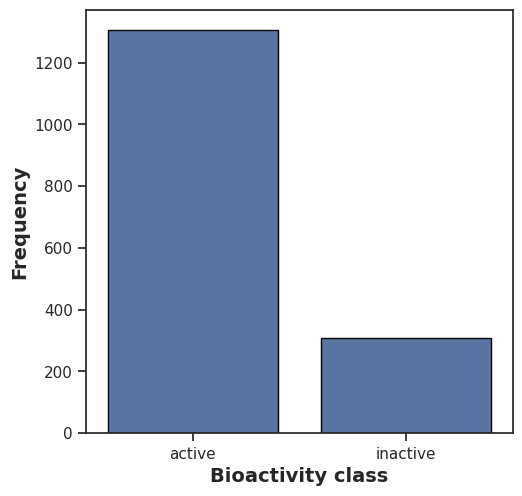

In [86]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### **Scatter plot of MW versus LogP**


---

It can be seen that the 2 bioactivity classes are spanning similar chemical spaces as evident by the scatter plot of MW vs LogP.

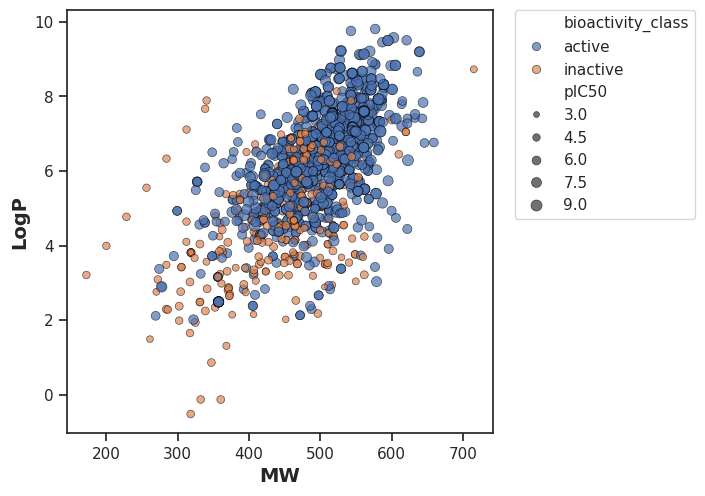

In [87]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

Distribution of Bioactivity Classes: By coloring the points based on the 'bioactivity_class', you can observe how different classes of molecules are distributed across the MW-LogP space. This can provide insights into the relationship between molecular properties and bioactivity.

Insights for Drug Design: Understanding how different bioactivity classes are distributed across the MW-LogP space can provide valuable insights for drug discovery and design. Researchers can use this information to **prioritize regions of chemical space that are more likely to yield molecules with desired bioactivities**, thereby accelerating the drug discovery process.

### **Box plots**

#### **pIC50 value**

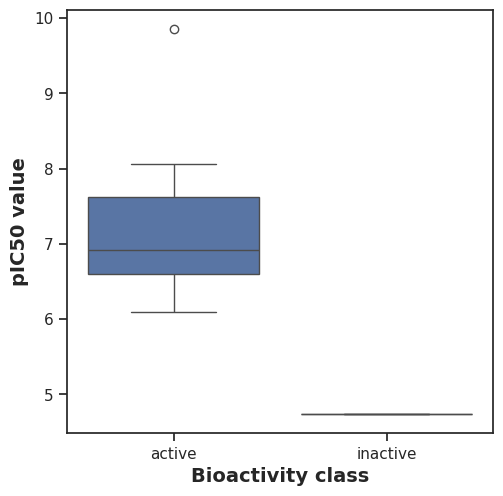

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [88]:
def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  active = df[df.bioactivity_class == 'active']
  active = active[descriptor]

  selection = [descriptor, 'bioactivity_class']
  df = df_2class[selection]
  inactive = df[df.bioactivity_class == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'

  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results

mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,404860.0,2.154229e-165,0.05,Different distribution (reject H0)


H0: There is no difference in the distribution of 'pIC50' values between the 'active' and 'inactive' bioactivity classes.

*Interpretation:* The p-value is much smaller than the significance level (p < alpha), indicating strong evidence to reject the null hypothesis. Therefore, the interpretation is "Different distribution (reject H0)". This suggests that there is a statistically significant difference between the distributions of 'pIC50' values for the 'active' and 'inactive' bioactivity classes.

*From this interpretation, we can understand the following:*

Significance of the Test: The extremely small p-value suggests that the observed difference in 'pIC50' values between the 'active' and 'inactive' classes is **highly unlikely to have occurred by random chance alone**.


Importance of 'pIC50' Descriptor: Since the Mann-Whitney U test identifies 'pIC50' as a significant descriptor in distinguishing between active and inactive compounds, **it implies that 'pIC50' is a valuable feature for predicting bioactivity in the QSAR model**.

#### **MW**

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,291456.0,1.863988e-33,0.05,Different distribution (reject H0)


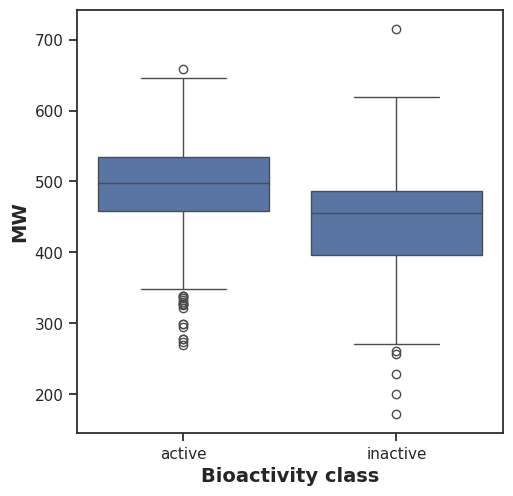

In [89]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

mannwhitney('MW')

#### **LogP**

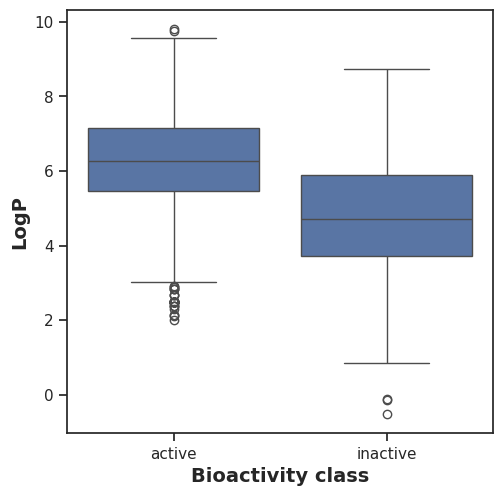

In [90]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [91]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,307905.0,2.902892e-46,0.05,Different distribution (reject H0)


#### **NumHDonors**

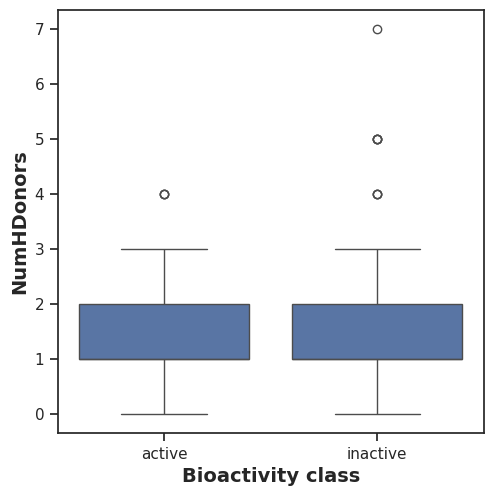

In [92]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [93]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,220837.0,0.004085,0.05,Different distribution (reject H0)


#### **NumHAcceptors**

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,176441.5,0.000321,0.05,Different distribution (reject H0)


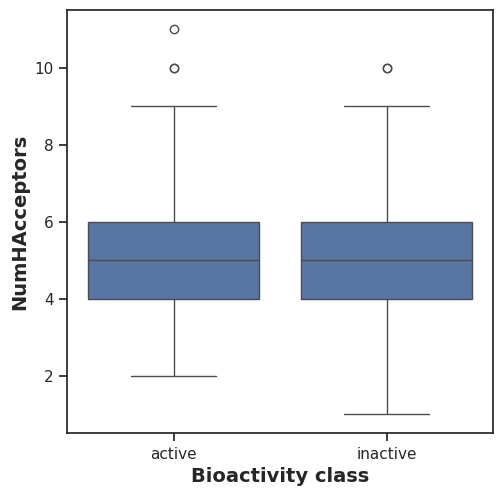

In [94]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'NumHAcceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHAcceptors.pdf')

mannwhitney('NumHAcceptors')

#### **Interpretation of Statistical Results**

##### **Box Plots**

###### **pIC50 values**



Taking a look at pIC50 values, the **actives** and **inactives** displayed ***statistically significant difference***, which is to be expected since threshold values (``IC50 < 1,000 nM = Actives while IC50 > 10,000 nM = Inactives``, corresponding to ``pIC50 > 6 = Actives and pIC50 < 5 = Inactives``) were used to define actives and inactives.

###### **Lipinski's descriptors**

Of the 4 Lipinski's descriptors (MW, LogP, NumHDonors and NumHAcceptors), only LogP exhibited ***no difference*** between the **actives** and **inactives** while the other 3 descriptors (MW, NumHDonors and NumHAcceptors) shows ***statistically significant difference*** between **actives** and **inactives**.


## **Zip files**

In [95]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_NumHAcceptors.csv (deflated 11%)
  adding: plot_MW.pdf (deflated 39%)
  adding: plot_bioactivity_class.pdf (deflated 38%)
  adding: bioactivity_data.csv (deflated 93%)
  adding: mannwhitneyu_MW.csv (deflated 8%)
  adding: mannwhitneyu_NumHDonors.csv (deflated 10%)
  adding: plot_MW_vs_LogP.pdf (deflated 3%)
  adding: plot_NumHAcceptors.pdf (deflated 38%)
  adding: mannwhitneyu_pIC50.csv (deflated 10%)
  adding: bioactivity_preprocessed_data.csv (deflated 85%)
  adding: plot_LogP.pdf (deflated 38%)
  adding: mannwhitneyu_LogP.csv (deflated 8%)
  adding: plot_NumHDonors.pdf (deflated 38%)


In [96]:
df_2class.to_csv('bio_data_preproc_scnd_drft.csv', index=False)
from google.colab import files
files.download('bio_data_preproc_scnd_drft.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Dataset preparation

 we will be calculating molecular descriptors that are essentially quantitative description of the compounds in the dataset. Finally, we will be preparing this into a dataset for subsequent model building.


## **Download PaDEL-Descriptor**

PaDEL-Descriptor is a software tool used in cheminformatics and computational chemistry for calculating molecular descriptors. Molecular descriptors are essential inputs for QSAR modeling, which aims to predict the biological activity, toxicity, or other properties of chemical compounds based on their molecular structure. PaDEL-Descriptor can generate descriptor datasets that can be used as features for building QSAR models.

In [97]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

! unzip padel.zip

--2024-06-02 17:05:28--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2024-06-02 17:05:29--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip’

padel.zip           100%[===================>]  24.57M  54.2MB/s    in 0.5s    

2024-06-02 17:05:31 (54.2 MB/s) - ‘padel.zip’ saved [25768637/25768637]

--2024-06-02 17:05:31--  https://git

## **Load bioactivity data**

Download the curated ChEMBL bioactivity data that has been pre-processed earlier in this Bioinformatics Project series that essentially contain the pIC50 values that we will be using for building a regression model.

In [98]:
import pandas as pd

In [99]:
df3 = pd.read_csv('bio_data_preproc_scnd_drft.csv')
df3

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL327767,CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC...,active,533.690,7.5019,1.0,6.0,6.536107
1,CHEMBL94496,CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(...,active,519.663,7.4268,1.0,6.0,6.769551
2,CHEMBL420441,CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)...,active,512.027,6.9568,1.0,6.0,7.136677
3,CHEMBL121,CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1,active,357.435,2.4909,1.0,6.0,6.602060
4,CHEMBL330191,CCCc1cc(Oc2ccccc2)ccc1OCCCCOc1cccc(C2SC(=O)NC2...,active,491.609,6.6935,1.0,6.0,6.709965
...,...,...,...,...,...,...,...,...
1611,CHEMBL50,O=c1c(O)c(-c2ccc(O)c(O)c2)oc2cc(O)cc(O)c12,inactive,302.238,1.9880,5.0,7.0,4.585027
1612,CHEMBL150,O=c1c(O)c(-c2ccc(O)cc2)oc2cc(O)cc(O)c12,inactive,286.239,2.2824,4.0,6.0,4.636388
1613,CHEMBL13045,COc1ccc2c(c[n+](C)c3c4cc5c(cc4ccc23)OCO5)c1OC,active,348.378,3.7166,0.0,4.0,6.247184
1614,CHEMBL1236924,O=S(=O)(Nc1cc(Cl)c(Oc2cnc3ccccc3c2)c(Cl)c1)c1c...,active,514.217,7.4415,1.0,4.0,7.744727


In [100]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [101]:
! cat molecule.smi | head -5

! cat molecule.smi | wc -l

CCCc1cc(Oc2ccc(CC(C)C)cc2)ccc1OCCCOc1cccc(C2SC(=O)NC2=O)c1	CHEMBL327767
CCCc1cc(Oc2ccc(C(C)C)cc2)ccc1OCCCOc1cccc(C2SC(=O)NC2=O)c1	CHEMBL94496
CCCc1cc(Oc2ccc(Cl)cc2)ccc1OCCCOc1cccc(C2SC(=O)NC2=O)c1	CHEMBL420441
CN(CCOc1ccc(CC2SC(=O)NC2=O)cc1)c1ccccn1	CHEMBL121
CCCc1cc(Oc2ccccc2)ccc1OCCCCOc1cccc(C2SC(=O)NC2=O)c1	CHEMBL330191
1616


## **Calculate fingerprint descriptors**


### **Calculate PaDEL descriptors**

Binary Representation of Fingerprint Descriptors: Instead of representing chemical structures, the binary representation of fingerprint descriptors could be used to encode the presence or absence of specific molecular or biological features associated with PARP gamma inhibition.

In [102]:
! cat padel.sh

! bash padel.sh

! ls -l

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv
Processing CHEMBL327767 in molecule.smi (1/1616). 
Processing CHEMBL94496 in molecule.smi (2/1616). 
Processing CHEMBL420441 in molecule.smi (3/1616). Average speed: 8.94 s/mol.
Processing CHEMBL121 in molecule.smi (4/1616). Average speed: 4.49 s/mol.
Processing CHEMBL330191 in molecule.smi (5/1616). Average speed: 3.32 s/mol.
Processing CHEMBL300629 in molecule.smi (6/1616). Average speed: 2.72 s/mol.
Processing CHEMBL328615 in molecule.smi (7/1616). Average speed: 2.39 s/mol.
Processing CHEMBL96107 in molecule.smi (8/1616). Average speed: 2.29 s/mol.
Processing CHEMBL94397 in molecule.smi (9/1616). Average speed: 2.14 s/mol.
Processing CHEMBL97529 in molecule.smi (10/1616). Average speed: 1.93 s/mol.
Processing CHEMBL96758 in molecule.smi (11/1616). Average

## **Preparing the X and Y Data Matrices**

### **X data matrix**

In [103]:
df3_X = pd.read_csv('descriptors_output.csv')

df3_X

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL327767,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL94496,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL121,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL420441,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL330191,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,CHEMBL3678128,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1612,CHEMBL150,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1613,CHEMBL13045,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1614,CHEMBL1236924,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1612,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1613,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1614,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


## **Y variable**

### **Convert IC50 to pIC50**

In [105]:
df3_Y = df3['pIC50']
df3_Y

0       6.536107
1       6.769551
2       7.136677
3       6.602060
4       6.709965
          ...   
1611    4.585027
1612    4.636388
1613    6.247184
1614    7.744727
1615    7.744727
Name: pIC50, Length: 1616, dtype: float64

## **Combining X and Y variable**

In [106]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.536107
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.769551
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.136677
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.602060
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.709965
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.585027
1612,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.636388
1613,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.247184
1614,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.744727


In [108]:
dataset3.to_csv('data_for_building_model.csv', index=False)

# **Building Machine Learning Model**

we will be building a regression model of inhibitors using the random forest algorithm.

## **1. Import libraries**

In [109]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor


## **2. Load the data set**

In [110]:
df = pd.read_csv('data_for_building_model.csv')

## **3. Input features**

**3.1. Input features**

In [111]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1612,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1613,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1614,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [112]:
Y = df.pIC50
Y

0       6.536107
1       6.769551
2       7.136677
3       6.602060
4       6.709965
          ...   
1611    4.585027
1612    4.636388
1613    6.247184
1614    7.744727
1615    7.744727
Name: pIC50, Length: 1616, dtype: float64

### **3.2. Output features**

### **3.3. Let's examine the data dimension**

In [113]:
X.shape

(1616, 881)

In [114]:
Y.shape

(1616,)

### **3.4. Remove low variance features**

In [115]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

X.shape

(1616, 165)

## **4. Data split (80/20 ratio)**

In [116]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [117]:
X_train.shape, Y_train.shape

((1292, 165), (1292,))

In [118]:
X_test.shape, Y_test.shape

((324, 165), (324,))

## **5. Building a Regression Model using Random Forest**

In [119]:
model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.5514777488846874

In [120]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

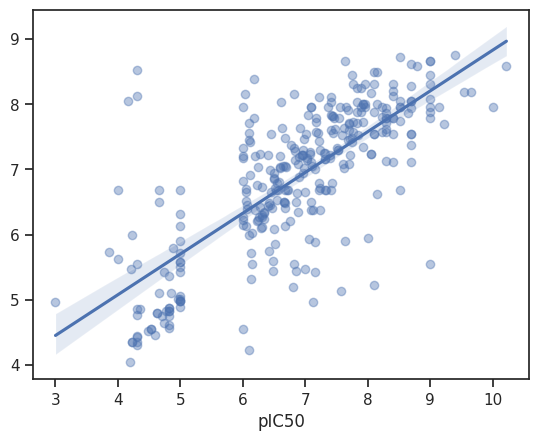

In [121]:
# Check if 'regplot' is a function or a variable
import seaborn as sns

if not callable(sns.regplot):
    # If 'regplot' is a variable, restore the original function
    !pip install seaborn
    import seaborn as sns

# Plot the regression line
ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})

we will be comparing several ML algorithms for build regression models of inhibitors.

## **1. Import libraries**

In [122]:
%pip install lazypredict --no-deps


In [123]:
import sys
sys.path.append('/path/to/lazypredict')

In [124]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**

In [125]:
df = pd.read_csv('bio_data_preproc_scnd_drft.csv')

X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [126]:
# Examine X dimension
X.shape

(1616, 7)

In [127]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1616 entries, 0 to 1615
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  1616 non-null   object 
 1   canonical_smiles    1616 non-null   object 
 2   bioactivity_class   1616 non-null   object 
 3   MW                  1616 non-null   float64
 4   LogP                1616 non-null   float64
 5   NumHDonors          1616 non-null   float64
 6   NumHAcceptors       1616 non-null   float64
dtypes: float64(4), object(3)
memory usage: 88.5+ KB


In [130]:
# # # Remove low variance features
# from sklearn.feature_selection import VarianceThreshold
# selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
# X = selection.fit_transform(X)
# X.shape

In [131]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [132]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

100%|██████████| 42/42 [00:10<00:00,  4.04it/s]


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 1292, number of used features: 8
[LightGBM] [Info] Start training from score 6.759238
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


100%|██████████| 42/42 [00:07<00:00,  5.76it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1042
[LightGBM] [Info] Number of data points in the train set: 1292, number of used features: 8
[LightGBM] [Info] Start training from score 6.759238


In [133]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.99,0.99,0.13,0.09
ExtraTreeRegressor,0.99,0.99,0.13,0.07
ExtraTreesRegressor,0.99,0.99,0.13,0.39
GaussianProcessRegressor,0.99,0.99,0.13,0.50
XGBRegressor,0.98,0.98,0.16,0.58
RandomForestRegressor,0.97,0.97,0.24,0.99
BaggingRegressor,0.96,0.96,0.27,0.11
HistGradientBoostingRegressor,0.93,0.93,0.33,0.53
LGBMRegressor,0.93,0.93,0.33,0.17


In [139]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,


## **5. Data visualization of model performance**

[(0.0, 1.0)]

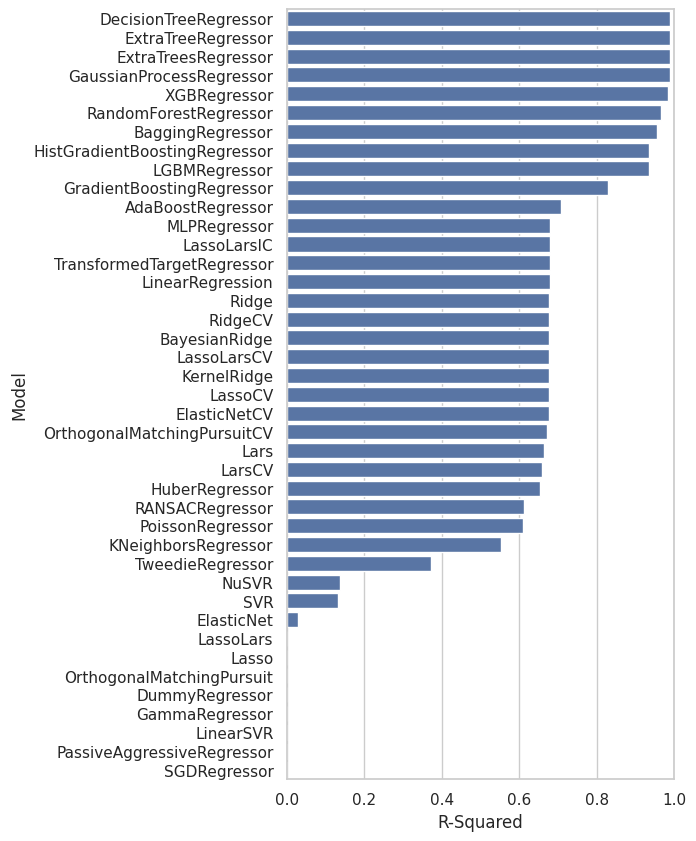

In [135]:
# Bar plot of R-squared values
import matplotlib.pyplot as plt
import seaborn as sns

#train["R-Squared"] = [0 if i < 0 else i for i in train.iloc[:,0] ]

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="R-Squared", data=predictions_train)
ax.set(xlim=(0, 1))

R-squared measures the goodness of fit of the regression model, indicating how well the model explains the variability in the dependent variable.

[(0.0, 10.0)]

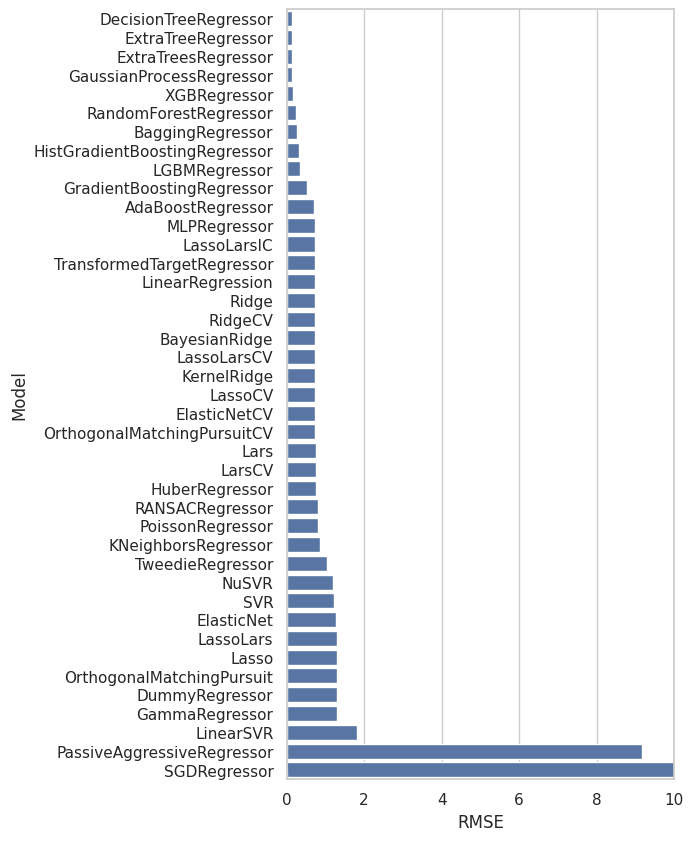

In [136]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

Note that **lower values of RMSE indicate better model performance**, as they indicate smaller prediction errors and better agreement between the actual and predicted values.

[(0.0, 10.0)]

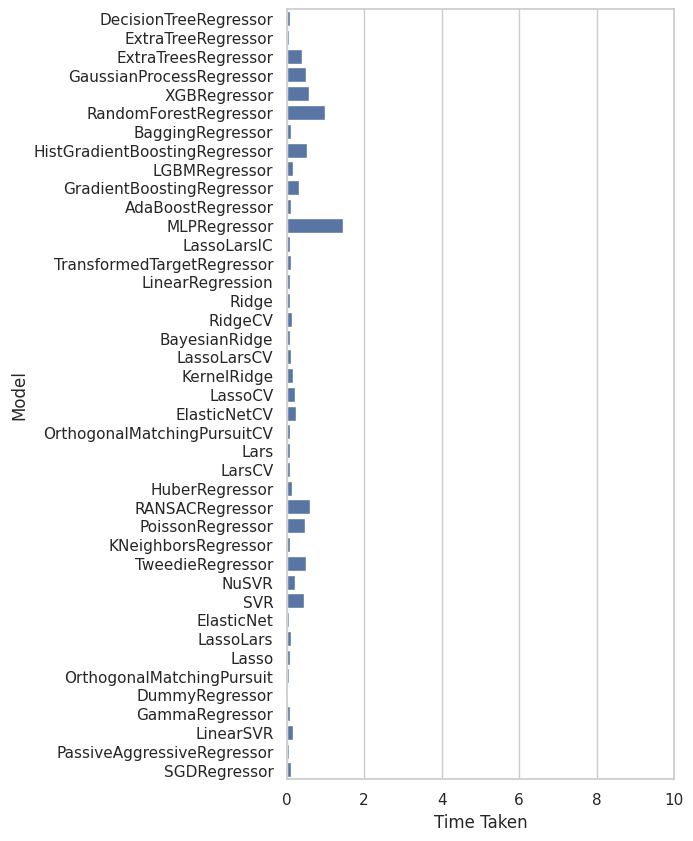

In [137]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))

Given these interpretations, here are some observations:

Models with higher Adjusted R-Squared and R-Squared values generally indicate better fit to the data.
Lower RMSE values indicate better accuracy in predicting the target variable.
Faster time taken is preferable, especially for large datasets or real-time applications.

# **Choosing top model**

According to train data:

In [140]:
import pandas as pd

# Create a DataFrame from the provided metrics
data = {
    'Model': ['DecisionTreeRegressor', 'ExtraTreeRegressor', 'ExtraTreesRegressor',
              'GaussianProcessRegressor', 'XGBRegressor', 'RandomForestRegressor',
              'BaggingRegressor', 'HistGradientBoostingRegressor', 'LGBMRegressor',
              'GradientBoostingRegressor'],
    'Adjusted R-Squared': [0.99, 0.99, 0.99, 0.99, 0.98, 0.97, 0.96, 0.93, 0.93, 0.83],
    'R-Squared': [0.99, 0.99, 0.99, 0.99, 0.98, 0.97, 0.96, 0.93, 0.93, 0.83],
    'RMSE': [0.13, 0.13, 0.13, 0.13, 0.16, 0.24, 0.27, 0.33, 0.33, 0.54],
    'Time Taken': [0.09, 0.07, 0.39, 0.50, 0.58, 0.99, 0.11, 0.53, 0.17, 0.33]
}

# Convert the data to a DataFrame
df = pd.DataFrame(data)

# Print the DataFrame
print(df)


                           Model  Adjusted R-Squared  R-Squared  RMSE  \
0          DecisionTreeRegressor                0.99       0.99  0.13   
1             ExtraTreeRegressor                0.99       0.99  0.13   
2            ExtraTreesRegressor                0.99       0.99  0.13   
3       GaussianProcessRegressor                0.99       0.99  0.13   
4                   XGBRegressor                0.98       0.98  0.16   
5          RandomForestRegressor                0.97       0.97  0.24   
6               BaggingRegressor                0.96       0.96  0.27   
7  HistGradientBoostingRegressor                0.93       0.93  0.33   
8                  LGBMRegressor                0.93       0.93  0.33   
9      GradientBoostingRegressor                0.83       0.83  0.54   

   Time Taken  
0        0.09  
1        0.07  
2        0.39  
3        0.50  
4        0.58  
5        0.99  
6        0.11  
7        0.53  
8        0.17  
9        0.33  


In [141]:
# Calculate a combined score for each model based on the provided metrics
df['Score'] = df['Adjusted R-Squared'] * df['R-Squared'] / df['RMSE'] * df['Time Taken']

# Find the model with the highest score
best_model = df.loc[df['Score'].idxmax()]

print("Best Model to Deploy:")
print(best_model)


Best Model to Deploy:
Model                 RandomForestRegressor
Adjusted R-Squared                     0.97
R-Squared                              0.97
RMSE                                   0.24
Time Taken                             0.99
Score                                  3.88
Name: 5, dtype: object


In [142]:
print(X_train.shape)

(1292, 7)


In [149]:
X_train.columns


Index(['molecule_chembl_id', 'canonical_smiles', 'bioactivity_class', 'MW',
       'LogP', 'NumHDonors', 'NumHAcceptors'],
      dtype='object')

Encoding the chEMBL ID column because it is causing issues later on

In [151]:
from sklearn.preprocessing import LabelEncoder


# Initialize a new LabelEncoder for 'molecule_chembl_id' column
molecule_chembl_id_encoder = LabelEncoder()

# Fit and transform the 'molecule_chembl_id' column
X_train_encoded['molecule_chembl_id'] = molecule_chembl_id_encoder.fit_transform(X_train['molecule_chembl_id'])


For label encoder reversing purposes:

In [150]:
# from sklearn.preprocessing import LabelEncoder

# # Assuming 'X_train_encoded' is the DataFrame with label-encoded features
# # Assuming 'label_encoders' is a dictionary containing trained LabelEncoder objects for each column

# # Reverse label encoding for the 'molecule_chembl_id' column
# molecule_chembl_id_encoder = label_encoders['molecule_chembl_id']
# X_train_original['molecule_chembl_id'] = molecule_chembl_id_encoder.inverse_transform(X_train_encoded['molecule_chembl_id'])

# # If there were any missing values in the original data, you may need to handle them
# # For example, fill missing values with a placeholder or impute them based on the data distribution



NameError: name 'X_train_original' is not defined

In [154]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Assuming 'X_train' and 'Y_train' are your training features and target, respectively
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20]
}

# Instantiate GridSearchCV with RandomForestRegressor
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=param_grid, cv=5)

# Fit the grid search to find the best parameters
grid_search.fit(X_train_encoded, Y_train)

# Get the best parameters found by GridSearchCV
best_params = grid_search.best_params_



In [155]:
print(best_params)

{'max_depth': 20, 'n_estimators': 200}


In [157]:
from sklearn.ensemble import RandomForestRegressor


# Assuming you've already imported RandomForestRegressor

# Instantiate RandomForestRegressor with specified hyperparameters
random_forest_model = RandomForestRegressor(max_depth=20, n_estimators=200)

# Train the model on the training data
random_forest_model.fit(X_train_encoded, Y_train)


RandomForestRegressor(max_depth=20, n_estimators=200)

In [166]:
import joblib

# Save the trained Random Forest model
joblib.dump(random_forest_model, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [167]:
import pickle

# Assuming 'best_model' is the best-performing model object
with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model, f)
